In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of handwritten digits 0-9

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [2]:
#Train Model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 56s 939us/step - loss: 0.2737 - acc: 0.9195
Epoch 2/3
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1138 - acc: 0.9643
Epoch 3/3
60000/60000 [==============================] - 59s 990us/step - loss: 0.0745 - acc: 0.9774


In [4]:
#Evaluate Accuracy and Loss
val_loss, val_acc = model.evaluate(x_test,y_test)
print("Loss Percent:",val_loss*100,", Percent Accurate",val_acc*100)

10000/10000 [==============================] - 3s 288us/step
Loss Percent: 9.318648621104659 , Percent Accurate 97.00999999999999


In [5]:
model.save('epic_num_reader.model')

In [7]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

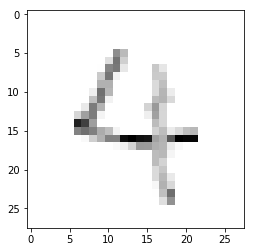

Prediction: 4


In [14]:
import numpy as np
import matplotlib.pyplot as plt
i=24
plt.imshow(x_test[i], cmap = plt.cm.binary)
plt.show()
predictions = new_model.predict([x_test])
print('Prediction:',np.argmax(predictions[i]))